In [7]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, r2_score, roc_auc_score, roc_curve

#import shap
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

In [25]:
hospital_table_3 = pd.read_csv(r"C:\Users\amirf\Downloads\hospital_table_3.csv",parse_dates=['Date'], index_col='Date')
hospital_table_3.head()


,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
Date,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,46.2,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,48.9,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,47.3,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,45.7,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,44.6,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0


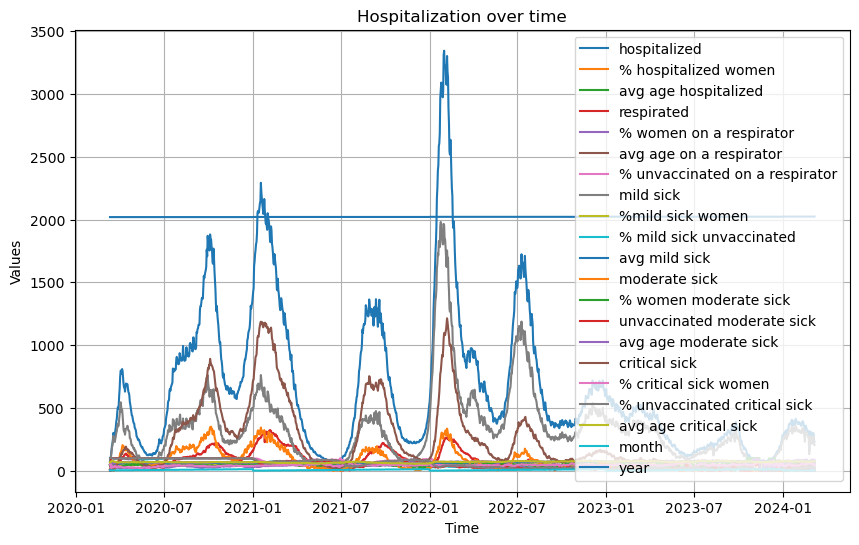

In [31]:
# visualization of all features

plt.figure(figsize=(10, 6))
for column in hospital_table_3.columns:
    plt.plot(hospital_table_3.index, hospital_table_3[column], label=column)

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

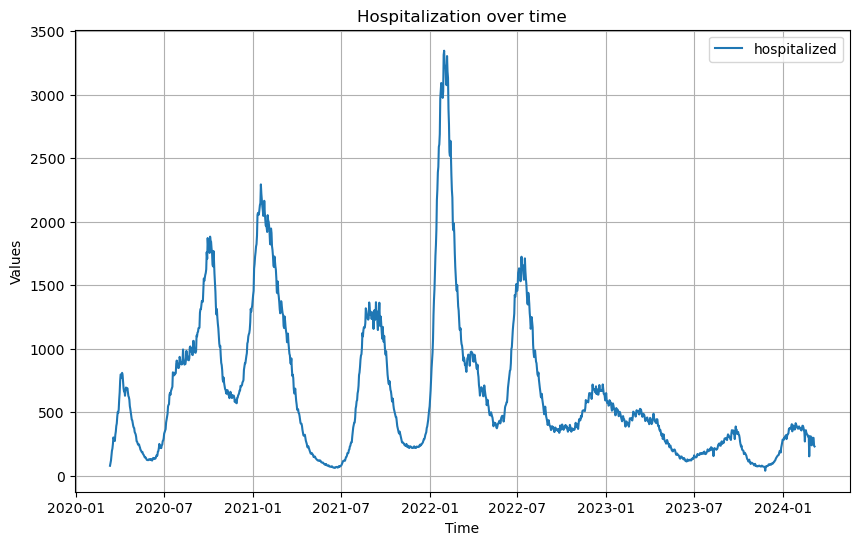

In [26]:
# visualization - 1 feature

plt.figure(figsize=(10, 6))
plt.plot(hospital_table_3.index, hospital_table_3["hospitalized"], label="hospitalized")

plt.title('Hospitalization over time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

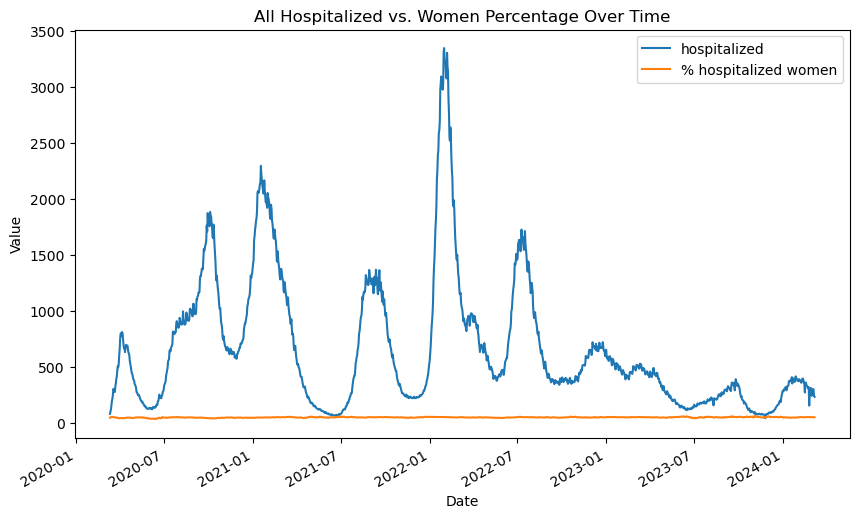

In [27]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = '% hospitalized women'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Women Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

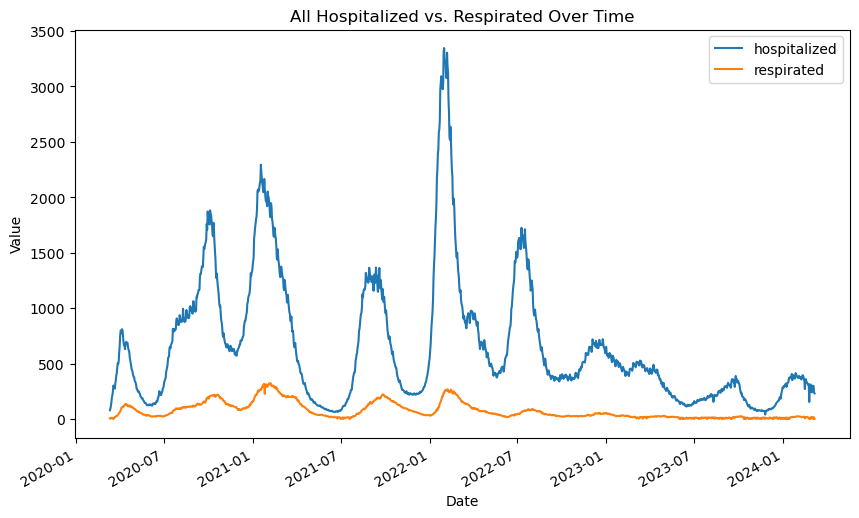

In [28]:
# visualization of 2 features

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

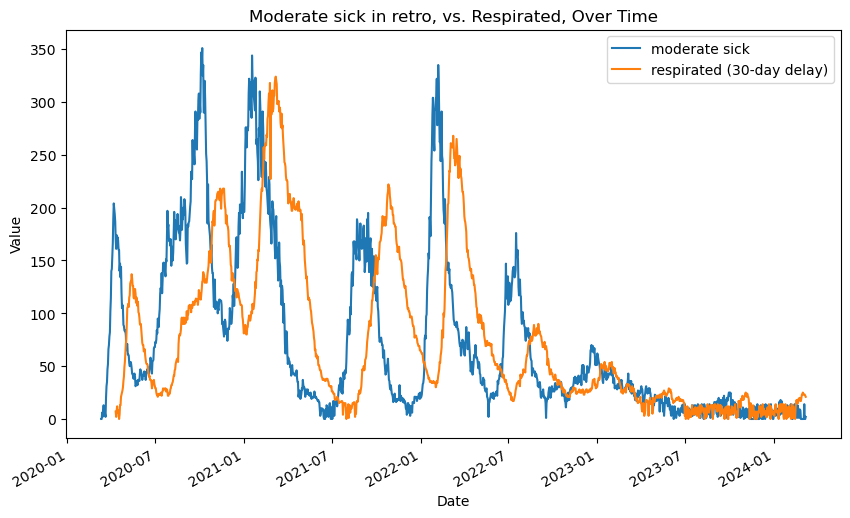

In [29]:
# visualization of 2 features, one of them delayed in time

# Select the two features you want to plot
feature1 = 'moderate sick'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature with 30 days delay
ax.plot(hospital_table_3.index[30:], hospital_table_3[feature2][:-30], label=f'{feature2} (30-day delay)')

# Customize the plot
plt.title('Moderate sick in retro, vs. Respirated, Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()

In [30]:
# adding columns of time categories to the date index - month and years

hospital_table_3['month'] = hospital_table_3.index.month
hospital_table_3['year'] = hospital_table_3.index.year   
hospital_table_3.head()

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,...,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,...,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3,3,2020
2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,...,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3,3,2020
2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,...,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3,3,2020
2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,...,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8,3,2020
2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,...,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0,3,2020


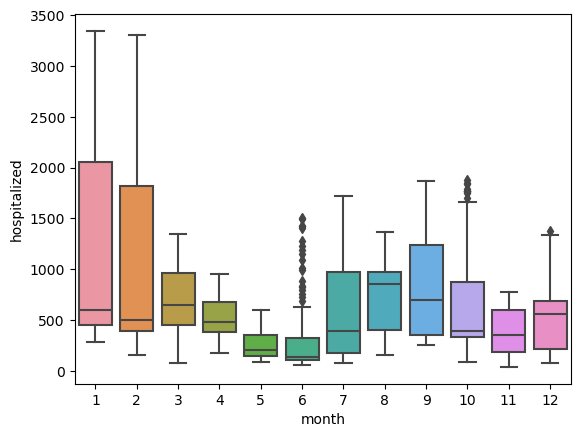

In [33]:
# visuallizing the above month category for hospitalizations over the years

sns.boxplot(x="month", y="hospitalized", data=hospital_table_3);

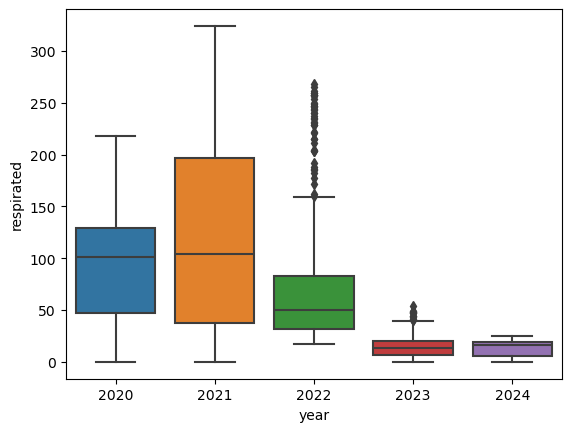

In [35]:
# visuallizing the above month category for respirations over the years

sns.boxplot(x="year", y="respirated", data=hospital_table_3);

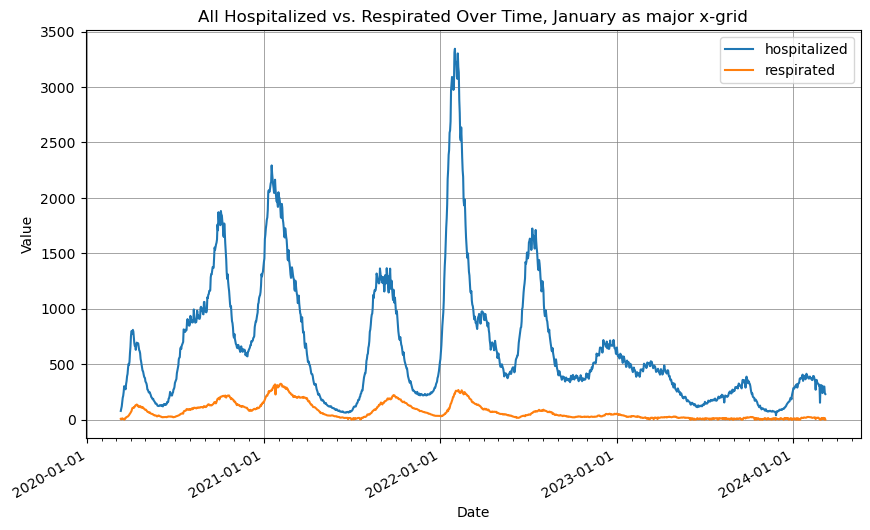

In [36]:
# visualization of 2 features, this time with month Januray as grid (to see the years change better)

import matplotlib.dates as mdates

# Select the two features you want to plot
feature1 = 'hospitalized'
feature2 = 'respirated'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first feature
ax.plot(hospital_table_3.index, hospital_table_3[feature1], label=feature1)

# Plot the second feature
ax.plot(hospital_table_3.index, hospital_table_3[feature2], label=feature2)

# Customize the plot
plt.title('All Hospitalized vs. Respirated Over Time, January as major x-grid')
plt.xlabel('Date')
plt.ylabel('Value')

# Set major locator to show ticks on January 1st
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set minor locator to show ticks on first day of each month
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Add grid for January only
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a legend to show which line is which
plt.legend()

# Display the plot
plt.show()